In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 31.5 MB/s 
     |████████████████████████████████| 77 kB 8.1 MB/s 
     |████████████████████████████████| 596 kB 64.7 MB/s 
     |████████████████████████████████| 6.6 MB 55.4 MB/s 
     |████████████████████████████████| 895 kB 59.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# !pip install bert-for-tf2 >> /dev/null

In [ ]:
# !pip install tensorflow==2.0.0

In [ ]:
import os
import math
import datetime
import tensorflow as tf
from tqdm import tqdm

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizor
from transformers import BertModel

# import bert
# from bert import BertModelLayer
# from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
# from bert.tokenization.bert_tokenization import FullTokenizer


In [ ]:
!gdown --id 1OlcvGWReJMuyYQuOZm149vHWwPtlboR6 --output train.csv
!gdown --id 1Oi5cRlTybuIF2Fl5Bfsr-KkqrXrdt77w --output valid.csv
!gdown --id 1ep9H6-HvhB4utJRLVcLzieWNUSG3P_uF --output test.csv

Downloading...
From: https://drive.google.com/uc?id=1OlcvGWReJMuyYQuOZm149vHWwPtlboR6
To: /content/train.csv
100% 799k/799k [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Oi5cRlTybuIF2Fl5Bfsr-KkqrXrdt77w
To: /content/valid.csv
100% 43.3k/43.3k [00:00<00:00, 57.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ep9H6-HvhB4utJRLVcLzieWNUSG3P_uF
To: /content/test.csv
100% 43.1k/43.1k [00:00<00:00, 52.1MB/s]


In [ ]:
tstart=191
tend=240

In [ ]:
train1 = pd.read_csv("train.csv")
valid = pd.read_csv("valid.csv")
test = pd.read_csv("test.csv")
train=train1[:tend]
test=test[:100]
valid=valid.sample(60)
# train = train.append(valid).reset_index(drop=True)

In [ ]:
print(valid)

                                                  text                intent
486                          give this album one stars              RateBook
501                 please look up the tv show  vanity    SearchCreativeWork
667                      is the two gladiators playing  SearchScreeningEvent
465    give 4 points to the person and the common good              RateBook
464         give the current textbook a rating of five              RateBook
409       rate the sneetches and other stories a three              RateBook
227  i need to know the weather for jan  the 3rd in...            GetWeather
119  i need a table for 4 please confirm the reserv...        BookRestaurant
574   find me the soundtrack live at the greek theatre    SearchCreativeWork
450          give the zenith angle one out of 6 points              RateBook
497                  rate the three junes one out of 6              RateBook
626  is the nightmare showing six hours from now at...  SearchScreeningEvent

In [ ]:
from transformers import BertTokenizer
classes = train.intent.unique().tolist()
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_input = tokenizer('book a taverna that serves vichyssoise within walking distance in oh',padding='max_length', max_length = 26, truncation=True, return_tensors="tf")
print(bert_input)
# print(bert_input.shape)
def _prepare(df):
    x, y = [], []
    
    for _, row in tqdm(df.iterrows()):
      dic={}
      text, label = row['text'], row['intent']
      bert_input = tokenizer(text,padding='max_length', max_length = 26, truncation=False, return_tensors="pt")
      # temp=bert_input['input_ids']
      # print(temp)
      dic['input_ids']=bert_input['input_ids']
      dic['mask']=bert_input['attention_mask']
      x.append(dic)
      y.append(classes.index(label))
    return np.array(x), np.array(y)
((train_x,train_y), (valid_x,valid_y)) =map(_prepare, [train, valid])
train_y,valid_y=torch.from_numpy(train_y),torch.from_numpy(valid_y)
    



Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

{'input_ids': <tf.Tensor: shape=(1, 26), dtype=int32, numpy=
array([[  101,  2338,  1037, 13090,  2050,  2008,  4240, 29177, 24137,
         5562,  2306,  3788,  3292,  1999,  2821,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 26), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 26), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]], dtype=int32)>}


240it [00:00, 669.69it/s]
60it [00:00, 522.22it/s]


In [ ]:
print(train_y.shape)
train_y=train_y.view(train.shape[0],1)
valid_y=valid_y.view(valid.shape[0],1)
print(valid_y.shape)

torch.Size([240])
torch.Size([60, 1])


In [ ]:
train_y[9]

tensor([4])

In [ ]:
classes

['PlayMusic',
 'AddToPlaylist',
 'RateBook',
 'SearchScreeningEvent',
 'BookRestaurant',
 'GetWeather',
 'SearchCreativeWork']

In [ ]:
 bert1=BertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(bert1)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [ ]:
c="play some seventies filipp kirkorow"
bert_input = tokenizer(c,padding='max_length', max_length = 26, truncation=False, return_tensors="pt")
input_id=bert_input['input_ids']
# input_id=input_id.numpy()
print(input_id)
r=bert1(input_id)['pooler_output']
# r=r.numpy()
# r=r[:,0,:]
print(r)

tensor([[  101,  2377,  2070, 26232, 10882, 15000,  2361, 11332, 14604,  2860,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0]])
tensor([[-0.7575, -0.3922, -0.8609,  0.6465,  0.3521, -0.1217,  0.5480,  0.3138,
         -0.6562, -1.0000,  0.1510,  0.7787,  0.9587,  0.6255,  0.7540, -0.3826,
          0.1961, -0.4454,  0.4272, -0.0617,  0.6428,  1.0000,  0.0835,  0.2724,
          0.4108,  0.9156, -0.5536,  0.7615,  0.9002,  0.7406, -0.3686,  0.2016,
         -0.9745, -0.3379, -0.9461, -0.9825,  0.2256, -0.5059, -0.1613, -0.0281,
         -0.7191,  0.3251,  0.9999,  0.4439,  0.1762, -0.1728, -1.0000,  0.3187,
         -0.6951,  0.7994,  0.6933,  0.7885,  0.1821,  0.4424,  0.3792, -0.1034,
         -0.0760,  0.1015, -0.2641, -0.5908, -0.6294,  0.5734, -0.6729, -0.8165,
          0.6100,  0.7568, -0.1674, -0.3708, -0.0597,  0.0239,  0.5576,  0.1827,
         -0.1378, -0.8512,  0.4874,  0.3292, -0.6684,  1.000

In [ ]:
# from bert.tokenization.bert_tokenization import FullTokenizer
# btokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))

In [ ]:
embedding=bert1.embeddings.word_embeddings
# tokenizer.pad_token_id
print(embedding)

Embedding(30522, 768, padding_idx=0)


In [ ]:
classes = train.intent.unique().tolist()
print(classes)

['PlayMusic', 'AddToPlaylist', 'RateBook', 'SearchScreeningEvent', 'BookRestaurant', 'GetWeather', 'SearchCreativeWork']


In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet,self).__init__()
    
    self.bert = bert1
    self.dropout = nn.Dropout(0.5)
    self.linear = nn.Linear(768, 768)
    self.tanh = nn.Tanh()
    self.dropout1 = nn.Dropout(0.5)
    self.linear2 = nn.Linear(768,7)
    self.softmax =nn.Softmax(dim=1)
    # self.relu = nn.ReLU()

  def forward(self,x,mask=None):
    _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
    dropout_output = self.dropout(pooled_output)
    linear_output = self.linear(dropout_output)
    tanh_layer = self.tanh(linear_output)
    dropout2 = self.dropout(pooled_output)
    linear2 = self.linear2(dropout2)
    final_layer = self.softmax(linear2)
    return final_layer

In [ ]:
intent_model = NeuralNet()
loss_fn = nn.CrossEntropyLoss()
optim = optimizor.Adam(intent_model.parameters(), lr=1e-6)



In [ ]:
intent_model

NeuralNet(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  

In [ ]:
train_loss_arr=[]
val_loss_arr=[]
epochs=10# LR=0.001
count=0

In [ ]:
epochs = 20
loss_fn = nn.CrossEntropyLoss()
optim = optimizor.Adam(intent_model.parameters(), lr=1e-6)
for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in zip(train_x,train_y):
                
                train_label = train_label
                mask = train_input['mask']
                input_id = train_input['input_ids'].squeeze(1)
                output = intent_model.forward(input_id,mask)
                # print(train_label)
                batch_loss = loss_fn(output, train_label)
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                intent_model.zero_grad()
                batch_loss.backward()
                optim.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in zip(valid_x,valid_y):

                    val_label = val_label
                    mask = val_input['mask']
                    input_id = val_input['input_ids'].squeeze(1)

                    output = intent_model.forward(input_id,mask)

                    batch_loss = loss_fn(output, val_label)
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            train_loss_arr.append(total_loss_train/len(train_x))
            val_loss_arr.append(total_loss_val / len(valid_x))
            print(
                
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_x): .3f} \
                | Train Accuracy: {total_acc_train / len(train_x): .3f} \
                | Val Loss: {total_loss_val / len(valid_x): .3f} \
                | Val Accuracy: {total_acc_val / len(valid_x): .3f}')
                  


Epochs: 1 | Train Loss:  1.945                 | Train Accuracy:  0.142                 | Val Loss:  1.944                 | Val Accuracy:  0.183
Epochs: 2 | Train Loss:  1.924                 | Train Accuracy:  0.246                 | Val Loss:  1.928                 | Val Accuracy:  0.233
Epochs: 3 | Train Loss:  1.887                 | Train Accuracy:  0.383                 | Val Loss:  1.884                 | Val Accuracy:  0.383
Epochs: 4 | Train Loss:  1.855                 | Train Accuracy:  0.492                 | Val Loss:  1.860                 | Val Accuracy:  0.433
Epochs: 5 | Train Loss:  1.806                 | Train Accuracy:  0.583                 | Val Loss:  1.834                 | Val Accuracy:  0.417
Epochs: 6 | Train Loss:  1.767                 | Train Accuracy:  0.621                 | Val Loss:  1.816                 | Val Accuracy:  0.500
Epochs: 7 | Train Loss:  1.720                 | Train Accuracy:  0.671                 | Val Loss:  1.770                 |

KeyboardInterrupt: ignored

In [ ]:
# train_loss_arr=[1,2,3,4,5,6,7,4,3,2]
# val_loss_arr=  [1,3,5,3,6,7,8,1,3,3]

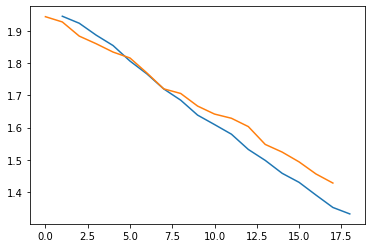

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1, 18, 18).astype(int), train_loss_arr,val_loss_arr)

In [ ]:
label2id={}
id2label={}
id=0
for t in classes:
  id2label[id]=t
  label2id[t]=id
  id+=1
print(id2label)
print(label2id)

In [ ]:
torch.save(intent_model,"/content/untitled")

In [ ]:
intent_model=torch.load("/content/untitled")

In [ ]:
from numpy import argmax
commands=["will it snow in mt on june 13 2038","on june 27 2026 i d like to go to a delaware gastropub","add garry shider album to my classical essentials"]
for command in commands:
  print(command)
  bert_input = tokenizer(command,padding='max_length', max_length = 26, truncation=True, return_tensors="pt")
  input_id=bert_input['input_ids']
  mask=bert_input['attention_mask']
  op_class=classes[argmax(intent_model(input_id,mask).detach().numpy()[0])]
  print(op_class)

will it snow in mt on june 13 2038
GetWeather
on june 27 2026 i d like to go to a delaware gastropub
BookRestaurant
add garry shider album to my classical essentials
AddToPlaylist


In [ ]:
import torch
print(intent_model.forward(input_id,mask))
ten=intent_model.forward(input_id,mask).detach().numpy()
pt=torch.Tensor(ten)
print(pt)

tensor([[0.0343, 0.8178, 0.0447, 0.0360, 0.0218, 0.0288, 0.0167]],
       grad_fn=<SoftmaxBackward0>)
tensor([[0.0554, 0.7602, 0.0550, 0.0371, 0.0296, 0.0381, 0.0245]])


In [ ]:
!pip install transformers_interpret

     |████████████████████████████████| 1.4 MB 8.6 MB/s 
  Created wheel for transformers-interpret: filename=transformers_interpret-0.6.0-py3-none-any.whl size=30723 sha256=3707e28e6e2a6c8eda54c42e31b518081c1201ee2d8bed43184039a795a81d4f
  Stored in directory: /root/.cache/pip/wheels/33/d9/23/f98fc0716eaab211a43aa7531c9b096df60dd34d1f0ec316bd
Successfully built transformers-interpret


In [ ]:
from transformers_interpret import SequenceClassificationExplainer

In [ ]:
import transformers_interpret
# transformers_interpret.version

In [ ]:
!pip install transformers
!pip install captum

In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# import torch
# import torch.nn as nn

# from transformers import BertTokenizer, BertForQuestionAnswering, BertConfig
# from transformers import BertModel

from captum.attr import visualization as viz
from captum.attr import LayerConductance, LayerIntegratedGradients

In [ ]:
def predicted_class_index(model,input_ids,attention_mask) -> int:
        "Returns predicted class index (int) for model with last calculated `input_ids`"
        if len(input_ids) > 0:
            ten = model(input_ids, attention_mask)
            preds=torch.Tensor(ten)
            pred_class = torch.argmax(torch.softmax(preds, dim=0)[0])
            return torch.argmax(torch.softmax(preds, dim=1)[0]).cpu().detach().numpy()

        else:
            raise InputIdsNotCalculatedError("input_ids have not been created yet.`")


In [ ]:
selected_index=predicted_class_index(intent_model,input_id,mask)
selected_index=int(selected_index)
selected_index

1

In [ ]:
import torch
cls_token_id=101
sep_token_id=102
ref_token_id=0
ref_input_ids = [[cls_token_id] + [ref_token_id] * 24 + [sep_token_id]]
# ref_input_ids=[[101, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 102]]
print(ref_input_ids)
ref_input_ids= torch.Tensor(ref_input_ids).type(torch.long)

ref_input_ids

[[101, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 102]]


tensor([[101,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 102]])

In [ ]:
# pred_probs=torch.Tensor()
def custom_forward (  # type: ignore
        input_ids: torch.Tensor,
        position_ids: torch.Tensor = None,
        attention_mask: torch.Tensor = None,
    ):

        
        ten = intent_model(input_ids, attention_mask)
        preds=torch.Tensor(ten)


        pred_probs = torch.softmax(preds, dim=1)[0][selected_index]
        print(pred_probs)
        return torch.softmax(preds, dim=1)[:, selected_index]


In [ ]:
# x=torch.tensor(0.3111)


In [ ]:
embedding

Embedding(30522, 768, padding_idx=0)

In [ ]:
lig = LayerIntegratedGradients(custom_forward, embedding,input_id)

In [ ]:
lig


In [ ]:
input_id

tensor([[  101,  5587, 21507, 11895,  4063,  2201,  2000,  2026,  4556,  6827,
          2015,   102,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0]])

In [ ]:
ref_input_ids

tensor([[101,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 102]])

In [ ]:
_attributions, delta = lig.attribute(
                inputs=input_id,
                baselines=ref_input_ids,
                return_convergence_delta=True,
                internal_batch_size=1,
                n_steps=10,
            )

tensor(0.2805)
tensor(0.2772)


KeyError: ignored

In [ ]:
_attribution

NameError: ignored

In [ ]:
attributions_sum=summarize(_attributions)

In [ ]:
attributions_sum.sum()

In [ ]:
 x=torch.tensor(0.3115)


In [ ]:
def visualize_attributions(
         delta,attributions_sum,pred_prob, pred_class, true_class, attr_class, all_tokens
    ):

        return viz.VisualizationDataRecord(
            attributions_sum,
            pred_prob,
            pred_class,
            true_class,
            attr_class,
            attributions_sum.sum(),
            all_tokens.split(" "),
            delta,
        )

In [ ]:
attr_class=id2label[selected_index]
true_class=selected_index
pred_class=id2label[selected_index]
array_token=input_id.detach().numpy()[0]
token=tokenizer.decode(array_token)
score_viz=visualize_attributions(delta,attributions_sum,x,pred_class,true_class,attr_class,token)
print(score_viz)

In [ ]:
token.split(" ")

In [ ]:
score_viz.word_attributions

In [ ]:
score_viz.raw_input

In [ ]:
# html_filepath=None
html = viz.visualize_text([score_viz])
# if html_filepath:
  # if not html_filepath.endswith(".html"):
    # html_filepath = h/tml_filepath + ".html"
  # with open(html_filepath, "w") as html_file:
    # html_file.write(html.data)

In [ ]:
model_path = 'bert-base-uncased'

# load model
model=BertModel.from_pretrained('bert-base-cased')
# model = BertForQuestionAnswering.from_pretrained(model_path)
model.eval()
model.zero_grad()

# load tokenizer
tokenizer = BertTokenizer.from_pretrained(model_path)

In [ ]:
ref_token_id = tokenizer.pad_token_id # A token used for generating token reference
sep_token_id = tokenizer.sep_token_id # A token used as a separator between question and text and it is also added to the end of the text.
cls_token_id = tokenizer.cls_token_id 

In [ ]:
def construct_whole_bert_embeddings(input_ids, ref_input_ids, \
                                    token_type_ids=None, ref_token_type_ids=None, \
                                    position_ids=None, ref_position_ids=None):
    input_embeddings = model.embeddings(input_ids, token_type_ids=token_type_ids, position_ids=position_ids)
    ref_input_embeddings = model.embeddings(ref_input_ids, token_type_ids=ref_token_type_ids, position_ids=ref_position_ids)
    
    return input_embeddings, ref_input_embeddings
def construct_input_ref_pair(question, text, ref_token_id, sep_token_id, cls_token_id):
    question_ids = tokenizer.encode(question, add_special_tokens=False)
    text_ids = tokenizer.encode(text, add_special_tokens=False)

    # construct input token ids
    input_ids = [cls_token_id] + question_ids + [sep_token_id] + text_ids + [sep_token_id]

    # construct reference token ids 
    ref_input_ids = [cls_token_id] + [ref_token_id] * len(question_ids) + [sep_token_id] + \
        [ref_token_id] * len(text_ids) + [sep_token_id]

    return torch.tensor([input_ids]), torch.tensor([ref_input_ids]), len(question_ids)

def construct_input_ref_token_type_pair(input_ids, sep_ind=0):
    seq_len = input_ids.size(1)
    token_type_ids = torch.tensor([[0 if i <= sep_ind else 1 for i in range(seq_len)]])
    ref_token_type_ids = torch.zeros_like(token_type_ids)# * -1
    return token_type_ids, ref_token_type_ids

def construct_input_ref_pos_id_pair(input_ids):
    seq_length = input_ids.size(1)
    position_ids = torch.arange(seq_length, dtype=torch.long)
    # we could potentially also use random permutation with `torch.randperm(seq_length, device=device)`
    ref_position_ids = torch.zeros(seq_length, dtype=torch.long)

    position_ids = position_ids.unsqueeze(0).expand_as(input_ids)
    ref_position_ids = ref_position_ids.unsqueeze(0).expand_as(input_ids)
    return position_ids, ref_position_ids
    
def construct_attention_mask(input_ids):
    return torch.ones_like(input_ids)

In [ ]:
question, text = command, op_class

In [ ]:
input_ids, ref_input_ids, sep_id = construct_input_ref_pair(question, text, ref_token_id, sep_token_id, cls_token_id)
token_type_ids, ref_token_type_ids = construct_input_ref_token_type_pair(input_ids, sep_id)
position_ids, ref_position_ids = construct_input_ref_pos_id_pair(input_ids)
attention_mask = construct_attention_mask(input_ids)

indices = input_ids[0].detach().tolist()
all_tokens = tokenizer.convert_ids_to_tokens(indices)

In [ ]:
def summarize_attributions(attributions):
    attributions = attributions.sum(dim=-1).squeeze(0)
    attributions = attributions / torch.norm(attributions)
    return attributions

In [ ]:
def squad_pos_forward_func2(input_emb, attention_mask=None, position=0):
    pred = model(inputs_embeds=input_emb, attention_mask=attention_mask, )
    pred = pred[position]
    return pred.max(1).values

In [ ]:
layer_attrs_start = []
layer_attrs_end = []

# The token that we would like to examine separately.
token_to_explain = 6 # the index of the token that we would like to examine more thoroughly
layer_attrs_start_dist = []
layer_attrs_end_dist = []

input_embeddings, ref_input_embeddings = construct_whole_bert_embeddings(input_ids, ref_input_ids, \
                                         token_type_ids=token_type_ids, ref_token_type_ids=ref_token_type_ids, \
                                         position_ids=position_ids, ref_position_ids=ref_position_ids)

for i in range(model.config.num_hidden_layers):
    lc = LayerConductance(squad_pos_forward_func2, model.encoder.layer[i])
    layer_attributions_start = lc.attribute(inputs=input_embeddings, baselines=ref_input_embeddings, additional_forward_args=(attention_mask, 0))
    layer_attributions_end = lc.attribute(inputs=input_embeddings, baselines=ref_input_embeddings, additional_forward_args=(attention_mask, 1))
    layer_attrs_start.append(summarize_attributions(layer_attributions_start).cpu().detach().tolist())
    layer_attrs_end.append(summarize_attributions(layer_attributions_end).cpu().detach().tolist())

    # storing attributions of the token id that we would like to examine in more detail in token_to_explain
    layer_attrs_start_dist.append(layer_attributions_start[0,token_to_explain,:].cpu().detach().tolist())
    layer_attrs_end_dist.append(layer_attributions_end[0,token_to_explain,:].cpu().detach().tolist())

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
xticklabels=all_tokens
yticklabels=list(range(1,13))
ax = sns.heatmap(np.array(layer_attrs_start), xticklabels=xticklabels, yticklabels=yticklabels, linewidth=0.2)
plt.xlabel('Tokens')
plt.ylabel('Layers')
plt.show()

In [ ]:
!pip install transformers_interpret
!pip install transformers

     |████████████████████████████████| 4.0 MB 6.5 MB/s 
     |████████████████████████████████| 1.4 MB 39.8 MB/s 
     |████████████████████████████████| 596 kB 47.8 MB/s 
     |████████████████████████████████| 895 kB 52.8 MB/s 
     |████████████████████████████████| 77 kB 4.8 MB/s 
     |████████████████████████████████| 6.5 MB 32.0 MB/s 
  Created wheel for transformers-interpret: filename=transformers_interpret-0.6.0-py3-none-any.whl size=30723 sha256=e476c55dc49cb208d245d756f259590471f8d2252fc5269925ff8d26ffe9d02b
  Stored in directory: /root/.cache/pip/wheels/33/d9/23/f98fc0716eaab211a43aa7531c9b096df60dd34d1f0ec316bd
Successfully built transformers-interpret
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers_interpret import SequenceClassificationExplainer


model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

cls_explainer = SequenceClassificationExplainer(model, tokenizer)
attributions = cls_explainer("I love you")

print(attributions.word_attributions)
cls_explainer.visualize("distilbert_example.html")

AttributeError: ignored